In [1]:
# imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.metrics import accuracy_score
import pickle

In [2]:
#lire la bd
data = pd.read_csv("datasets/investors.csv") 
data

Unnamed: 0 state_code   latitude   longitude zip_code       id  \
0          1005         CA  42.358880  -71.056820    92101   c:6669   
1           204         CA  37.238916 -121.973718    95032  c:16283   
2          1001         CA  32.901049 -117.192656    92121  c:65620   
3           738         CA  37.320309 -122.050040    95014  c:42668   
4          1002         CA  37.779281 -122.419236    94105  c:65806   
..          ...        ...        ...         ...      ...      ...   
918         352         CA  37.740594 -122.376471    94107  c:21343   
919         721         MA  42.504817  -71.195611     1803  c:41747   
920         557         CA  37.408261 -122.015920    94089  c:31549   
921         589         CA  37.556732 -122.288378    94404  c:33198   
922         462         CA  37.386778 -121.966277    95054  c:26702   

              city              Unnamed: 6                  name  labels  ...  \
0        San Diego                     NaN           Bandsintown       1  ...   
1        Los Gatos                     NaN             TriCipher       1  ...   
2        San Diego      San Diego CA 92121                 Plixi       1  ...   
3        Cupertino      Cupertino CA 95014     Solidcore Systems       1  ...   
4    San Francisco  San Francisco CA 94105        Inhale Digital       0  ...   
..             ...                     ...                   ...     ...  ...   
918  San Francisco                     NaN               CoTweet       1  ...   
919     Burlington      Burlington MA 1803    Reef Point Systems       0  ...   
920      Sunnyvale                     NaN       Paracor Medical       0  ...   
921  San Francisco                     NaN               Causata       1  ...   
922    Santa Clara    Santa Clara CA 95054  Asempra Technologies       1  ...   

    object_id has_VC has_angel has_roundA  has_roundB  has_roundC  has_roundD  \
0      c:6669      0         1          0           0           0           0   
1     c:16283      1         0          0           1           1           1   
2     c:65620      0         0          1           0           0           0   
3     c:42668      0         0          0           1           1           1   
4     c:65806      1         1          0           0           0           0   
..        ...    ...       ...        ...         ...         ...         ...   
918   c:21343      0         0          1           0           0           0   
919   c:41747      1         0          0           1           0           0   
920   c:31549      0         0          0           0           0           1   
921   c:33198      0         0          1           1           0           0   
922   c:26702      0         0          0           1           0           0   

     avg_participants  is_top500    status  
0              1.0000          0  acquired  
1              4.7500          1  acquired  
2              4.0000          1  acquired  
3              3.3333          1  acquired  
4              1.0000          1    closed  
..                ...        ...       ...  
918            6.0000          1  acquired  
919            2.6667          1    closed  
920            8.0000          1    closed  
921            1.0000          1  acquired  
922            3.0000          1  acquired  

[923 rows x 49 columns]

# 1- Nettoyer ses données 

In [3]:
# affiche toutes les lignes et colonnes
pd.set_option('display.max_row',data.shape[0]+1)
pd.set_option('display.max_columns',data.shape[0]+1)
data

Unnamed: 0 state_code   latitude   longitude        zip_code        id  \
0          1005         CA  42.358880  -71.056820           92101    c:6669   
1           204         CA  37.238916 -121.973718           95032   c:16283   
2          1001         CA  32.901049 -117.192656           92121   c:65620   
3           738         CA  37.320309 -122.050040           95014   c:42668   
4          1002         CA  37.779281 -122.419236           94105   c:65806   
5           379         CA  37.406914 -122.090370           94043   c:22898   
6           195         CA  37.391559 -122.070264           94041   c:16191   
7           875         CA  38.057107 -122.513742           94901    c:5192   
8            16         MA  42.712207  -73.203599            1267    c:1043   
9           846         CA  37.427235 -122.145783           94306     c:498   
10          685         CA  37.442988 -122.162413           94025    c:3949   
11          835         CA  37.452992 -122.185098           94025    c:4829   
12          531         KY  38.241467  -85.724511           40204   c:30290   
13          137         NY  40.702760  -73.986668           11201    c:1491   
14          162         CO  39.746273 -104.991157           80202   c:15645   
15          898         VA  38.901301  -77.265158           22182   c:54177   
16          235         CA  37.396283 -122.105531           94022   c:16770   
17           25         CA  37.590339 -122.341715           94010     c:107   
18          858         NY  40.730646  -73.986614           10004   c:50727   
19          454         CA  37.446411 -122.160540           94301   c:26368   
20          369         TX  30.235040  -97.800130           78735   c:22291   
21          289         WA  47.602605 -122.284865           98122   c:17857   
22          177         CA  37.426316 -122.141082           94306   c:15888   
23           26         CA  37.764395 -122.401024           94103   c:10751   
24          803         CO  40.010492 -105.276843           80302     c:458   
25          797         IL  41.875555  -87.624421           60601   c:45525   
26          572         CA  37.429676 -122.108548           94303    c:3193   
27          503         CA  37.870102 -122.268136           94704   c:28456   
28          642         TX  30.265344  -97.743586           78701   c:36920   
29          625         CA  33.708708 -117.852069           92705   c:35712   
30          355         CA  37.422859 -122.045217           94035   c:21492   
31          510         WA  47.603832 -122.330062           98119   c:28768   
32          485         NC  36.002893  -78.904075           27701   c:27741   
33          145         CA  37.779281 -122.419236           94105  c:150658   
34          605         PA  40.441694  -79.990086           15219   c:34338   
35          785         NY  40.739010  -73.997259           10011   c:45111   
36          562         CA  37.791137 -122.391843           94111    c:3178   
37          619         CA  37.404788 -121.940842           95134   c:35402   
38          378         CA  37.779501 -122.394871           94107   c:22856   
39           63         NY  40.755446  -73.980246           10010    c:1224   
40           65         GA  33.756806  -84.392198           30303    c:1234   
41          139         NH  42.995640  -71.454789            3101  c:149809   
42           98         CA  40.015733 -105.275027           94025   c:13733   
43          681         WA  47.636090 -122.327028           98102   c:39106   
44          884         CA  37.404973 -122.032353           94089    c:5306   
45          207         CA  37.368830 -122.036350           94085   c:16303   
46          747         NY  40.730646  -73.986614          100011   c:43188   
47          593         MA  42.375100  -71.105616            2139   c:33507   
48         1010         CA  37.779281 -122.419236           94607   c:68157   
49          403         CA  37.560781 -122.284114      

In [4]:
# donne les informations sur la DB
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [5]:
#affiche les informations sur la colonne roundB
data['has_roundB']

0      0
1      1
2      0
3      1
4      0
5      1
6      1
7      1
8      0
9      0
10     1
11     0
12     0
13     1
14     1
15     0
16     1
17     1
18     0
19     1
20     0
21     1
22     0
23     0
24     0
25     0
26     0
27     1
28     0
29     0
30     1
31     1
32     1
33     0
34     0
35     1
36     1
37     1
38     0
39     1
40     1
41     0
42     0
43     0
44     0
45     1
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     1
55     0
56     1
57     0
58     1
59     1
60     1
61     0
62     0
63     0
64     0
65     1
66     0
67     0
68     0
69     1
70     0
71     0
72     0
73     1
74     0
75     1
76     0
77     1
78     1
79     0
80     1
81     0
82     0
83     1
84     0
85     0
86     0
87     1
88     0
89     1
90     1
91     1
92     0
93     0
94     1
95     1
96     0
97     0
98     0
99     0
100    1
101    0
102    1
103    1
104    0
105    1
106    0
107    0
108    0
109    1
110    0
1

In [6]:
# afficher certaines donnees statistique
data.describe()

Unnamed: 0    latitude   longitude      labels  \
count   923.000000  923.000000  923.000000  923.000000   
mean    572.297941   38.517442 -103.539212    0.646804   
std     333.585431    3.741497   22.394167    0.478222   
min       1.000000   25.752358 -122.756956    0.000000   
25%     283.500000   37.388869 -122.198732    0.000000   
50%     577.000000   37.779281 -118.374037    1.000000   
75%     866.500000   40.730646  -77.214731    1.000000   
max    1153.000000   59.335232   18.057121    1.000000   

       age_first_funding_year  age_last_funding_year  \
count              923.000000             923.000000   
mean                 2.235630               3.931456   
std                  2.510449               2.967910   
min                 -9.046600              -9.046600   
25%                  0.576700               1.669850   
50%                  1.446600               3.528800   
75%                  3.575350               5.560250   
max                 21.895900              21.895900   

       age_first_milestone_year  age_last_milestone_year  relationships  \
count                771.000000               771.000000     923.000000   
mean                   3.055353                 4.754423       7.710726   
std                    2.977057                 3.212107       7.265776   
min                  -14.169900                -7.005500       0.000000   
25%                    1.000000                 2.411000       3.000000   
50%                    2.520500                 4.476700       5.000000   
75%                    4.686300                 6.753400      10.000000   
max                   24.684900                24.684900      63.000000   

       funding_rounds  funding_total_usd  milestones       is_CA       is_NY  \
count      923.000000       9.230000e+02  923.000000  923.000000  923.000000   
mean         2.310943       2.541975e+07    1.841820    0.527627    0.114843   
std          1.390922       1.896344e+08    1.322632    0.499507    0.319005   
min          1.000000       1.100000e+04    0.000000    0.000000    0.000000   
25%          1.000000       2.725000e+06    1.000000    0.000000    0.000000   
50%          2.000000       1.000000e+07    2.000000    1.000000    0.000000   
75%          3.000000       2.472500e+07    3.000000    1.000000    0.000000   
max         10.000000       5.700000e+09    8.000000    1.000000    1.000000   

            is_MA       is_TX  is_otherstate  is_software      is_web  \
count  923.000000  923.000000     923.000000   923.000000  923.000000   
mean     0.089924    0.045504       0.221018     0.165764    0.156013   
std      0.286228    0.208519       0.415158     0.372070    0.363064   
min      0.000000    0.000000       0.000000     0.000000    0.000000   
25%      0.000000    0.000000       0.000000     0.000000    0.000000   
50%      0.000000    0.000000       0.000000     0.000000    0.000000   
75%      0.000000    0.000000       0.000000     0.000000    0.000000   
max      1.000000    1.000000       1.000000     1.000000    1.000000   

       is_mobile  is_enterprise  is_advertising  is_gamesvideo  is_ecommerce  \
count  923.00000     923.000000      923.000000     923.000000    923.000000   
mean     0.08559       0.079090        0.067172       0.056338      0.027086   
std      0.27991       0.270025        0.250456       0.230698      0.162421   
min      0.00000       0.000000        0.000000       0.000000      0.000000   
25%      0.00000       0.000000        0.000000       0.000000      0.000000   
50%      0.00000       0.000000        0.000000       0.000000      0.000000   
75%      0.00000       0.000000        0.000000       0.000000      0.000000   
max      1.00000       1.000000        1.000000       1.000000      1.000000   

       is_biotech  is_consulting  is_othercategory      has_VC   has_angel  \
count  923.000000     923.000000        923.000000  923.000000  923.000000   
mean     0.036836       0.003250          0.3228

In [7]:
# permet de definir une nouvelle DB avec les champs qui nous interesse
new_data= data[['age_first_funding_year','age_last_funding_year','relationships', 'funding_rounds','funding_total_usd','milestones',
               'age_first_milestone_year','age_last_milestone_year','state_code.1','city','category_code','has_VC','has_angel','has_roundA',
                'has_roundB','has_roundC','has_roundD','status']]

new_data

age_first_funding_year  age_last_funding_year  relationships  \
0                    2.2493                 3.0027              3   
1                    5.1260                 9.9973              9   
2                    1.0329                 1.0329              5   
3                    3.1315                 5.3151              5   
4                    0.0000                 1.6685              2   
5                    4.5452                 4.5452              3   
6                    1.7205                 5.2110              6   
7                    1.6466                 6.7616             25   
8                    3.5863                11.1123             13   
9                    1.6712                 4.6849             14   
10                   4.6274                 9.4493             22   
11                   1.0849                 5.3370              8   
12                   4.9041                 4.9041              0   
13                   0.0192                 2.4356             15   
14                   4.6658                 8.9973             12   
15                   6.6082                 6.6082              0   
16                   2.5863                 6.7644              8   
17                   4.5918                 7.1726              7   
18                   0.7425                 1.5808             10   
19                   2.5014                 2.8301             13   
20                   2.2137                 3.7863              8   
21                   3.8329                 3.8329              3   
22                   5.4904                 5.4904              1   
23                  -1.0000                 3.3151              4   
24                   0.2521                 0.3370              5   
25                   4.8411                 4.8411              3   
26                   4.0603                 4.0603              7   
27                   4.0685                 4.0685              2   
28                   2.5068                 4.5315             37   
29                   1.1890                 1.1890              5   
30                   1.3534                 2.1644              3   
31                   4.1534                 5.1671              6   
32                  -0.1671                 2.0192              9   
33                   0.0000                 0.8685              3   
34                   0.0822                 0.0822              2   
35                   2.6575                 2.6575              1   
36                   0.6192                 1.5945              8   
37                   1.0630                 5.7014              0   
38                   0.1671                 2.6493             10   
39                   0.0000                 5.9041             18   
40                   0.0000                 4.8027             26   
41                   0.0000                 0.5836              9   
42                   0.1041                 2.3863              7   
43                   3.4904                 3.4904             10   
44                   4.6658                 4.6658             25   
45                   2.6247                 2.6247              4   
46                   0.9260                 2.9534              2   
47                   0.2466                 0.2466              9   
48                   0.1890                 1.1890              6   
49                   3.2082                 3.2082             11   
50                   2.5836                 2.5836              5   
51                   1.8932                 2.4466              4   
52                   0.7479                 0.7479             12   
53                   5.1863                 6.8137              9   
54                   0.6712                 6.2329             37   
55                   1.1863                 3.4986              0   
56                   2.1644                 4.7616             13   
57 

In [8]:
# affiche les infos sur la DB
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age_first_funding_year    923 non-null    float64
 1   age_last_funding_year     923 non-null    float64
 2   relationships             923 non-null    int64  
 3   funding_rounds            923 non-null    int64  
 4   funding_total_usd         923 non-null    int64  
 5   milestones                923 non-null    int64  
 6   age_first_milestone_year  771 non-null    float64
 7   age_last_milestone_year   771 non-null    float64
 8   state_code.1              922 non-null    object 
 9   city                      923 non-null    object 
 10  category_code             923 non-null    object 
 11  has_VC                    923 non-null    int64  
 12  has_angel                 923 non-null    int64  
 13  has_roundA                923 non-null    int64  
 14  has_roundB

In [9]:
# affiche les differents champs de la coluonne category
new_data['category_code'].unique()

array(['music', 'enterprise', 'web', 'software', 'games_video',
       'network_hosting', 'finance', 'mobile', 'education',
       'public_relations', 'security', 'other', 'photo_video', 'hardware',
       'ecommerce', 'advertising', 'travel', 'fashion', 'analytics',
       'consulting', 'biotech', 'cleantech', 'search', 'semiconductor',
       'social', 'medical', 'automotive', 'messaging', 'manufacturing',
       'hospitality', 'news', 'transportation', 'sports', 'real_estate',
       'health'], dtype=object)

In [10]:
# affiche True si trouve un valeur manquante
pd.isnull(new_data)

age_first_funding_year  age_last_funding_year  relationships  \
0                     False                  False          False   
1                     False                  False          False   
2                     False                  False          False   
3                     False                  False          False   
4                     False                  False          False   
5                     False                  False          False   
6                     False                  False          False   
7                     False                  False          False   
8                     False                  False          False   
9                     False                  False          False   
10                    False                  False          False   
11                    False                  False          False   
12                    False                  False          False   
13                    False                  False          False   
14                    False                  False          False   
15                    False                  False          False   
16                    False                  False          False   
17                    False                  False          False   
18                    False                  False          False   
19                    False                  False          False   
20                    False                  False          False   
21                    False                  False          False   
22                    False                  False          False   
23                    False                  False          False   
24                    False                  False          False   
25                    False                  False          False   
26                    False                  False          False   
27                    False                  False          False   
28                    False                  False          False   
29                    False                  False          False   
30                    False                  False          False   
31                    False                  False          False   
32                    False                  False          False   
33                    False                  False          False   
34                    False                  False          False   
35                    False                  False          False   
36                    False                  False          False   
37                    False                  False          False   
38                    False                  False          False   
39                    False                  False          False   
40                    False                  False          False   
41                    False                  False          False   
42                    False                  False          False   
43                    False                  False          False   
44                    False                  False          False   
45                    False                  False          False   
46                    False                  False          False   
47                    False                  False          False   
48                    False                  False          False   
49                    False                  False          False   
50                    False                  False          False   
51                    False                  False          False   
52                    False                  False          False   
53                    False                  False          False   
54                    False                  False          False   
55                    False                  False          False   
56                    False                  False          False   
57 

In [11]:
# permet de changer le nom d'une colonne
new_data = new_data.rename(columns={"category_code":"industry_type"})
new_data = new_data.rename(columns={"state_code.1":"state_code"})

In [12]:
# affiche la nouvelle DB
new_data

age_first_funding_year  age_last_funding_year  relationships  \
0                    2.2493                 3.0027              3   
1                    5.1260                 9.9973              9   
2                    1.0329                 1.0329              5   
3                    3.1315                 5.3151              5   
4                    0.0000                 1.6685              2   
5                    4.5452                 4.5452              3   
6                    1.7205                 5.2110              6   
7                    1.6466                 6.7616             25   
8                    3.5863                11.1123             13   
9                    1.6712                 4.6849             14   
10                   4.6274                 9.4493             22   
11                   1.0849                 5.3370              8   
12                   4.9041                 4.9041              0   
13                   0.0192                 2.4356             15   
14                   4.6658                 8.9973             12   
15                   6.6082                 6.6082              0   
16                   2.5863                 6.7644              8   
17                   4.5918                 7.1726              7   
18                   0.7425                 1.5808             10   
19                   2.5014                 2.8301             13   
20                   2.2137                 3.7863              8   
21                   3.8329                 3.8329              3   
22                   5.4904                 5.4904              1   
23                  -1.0000                 3.3151              4   
24                   0.2521                 0.3370              5   
25                   4.8411                 4.8411              3   
26                   4.0603                 4.0603              7   
27                   4.0685                 4.0685              2   
28                   2.5068                 4.5315             37   
29                   1.1890                 1.1890              5   
30                   1.3534                 2.1644              3   
31                   4.1534                 5.1671              6   
32                  -0.1671                 2.0192              9   
33                   0.0000                 0.8685              3   
34                   0.0822                 0.0822              2   
35                   2.6575                 2.6575              1   
36                   0.6192                 1.5945              8   
37                   1.0630                 5.7014              0   
38                   0.1671                 2.6493             10   
39                   0.0000                 5.9041             18   
40                   0.0000                 4.8027             26   
41                   0.0000                 0.5836              9   
42                   0.1041                 2.3863              7   
43                   3.4904                 3.4904             10   
44                   4.6658                 4.6658             25   
45                   2.6247                 2.6247              4   
46                   0.9260                 2.9534              2   
47                   0.2466                 0.2466              9   
48                   0.1890                 1.1890              6   
49                   3.2082                 3.2082             11   
50                   2.5836                 2.5836              5   
51                   1.8932                 2.4466              4   
52                   0.7479                 0.7479             12   
53                   5.1863                 6.8137              9   
54                   0.6712                 6.2329             37   
55                   1.1863                 3.4986              0   
56                   2.1644                 4.7616             13   
57 

In [13]:
# affiche le montant max en usd de la colonne fundingtotal
new_data['funding_total_usd'].max()

5700000000

In [14]:
# afficher le nombre de valeures manquantes par colone (NAN)
new_data.isnull().sum().sort_values(ascending=False)

age_first_milestone_year    152
age_last_milestone_year     152
state_code                    1
age_first_funding_year        0
has_VC                        0
has_roundD                    0
has_roundC                    0
has_roundB                    0
has_roundA                    0
has_angel                     0
city                          0
industry_type                 0
age_last_funding_year         0
milestones                    0
funding_total_usd             0
funding_rounds                0
relationships                 0
status                        0
dtype: int64

In [15]:
mean_afmy = new_data['age_first_milestone_year'].mean()
mean_afmy

3.055353047989626

In [16]:
mean_almy = new_data['age_last_milestone_year'].mean()
mean_almy

4.754422568093388

In [17]:
new_data['state_code'].fillna(method='bfill', inplace=True)
new_data['age_first_milestone_year'].fillna(value = mean_afmy, inplace=True)
new_data['age_last_milestone_year'].fillna(value = mean_almy, inplace=True)

In [18]:
new_data.isnull().sum().sort_values(ascending=False)

age_first_funding_year      0
age_last_funding_year       0
has_roundD                  0
has_roundC                  0
has_roundB                  0
has_roundA                  0
has_angel                   0
has_VC                      0
industry_type               0
city                        0
state_code                  0
age_last_milestone_year     0
age_first_milestone_year    0
milestones                  0
funding_total_usd           0
funding_rounds              0
relationships               0
status                      0
dtype: int64

In [19]:
num_data = new_data.drop(['state_code', 'city', 'industry_type', 'status'], axis=1) 
num_data

age_first_funding_year  age_last_funding_year  relationships  \
0                    2.2493                 3.0027              3   
1                    5.1260                 9.9973              9   
2                    1.0329                 1.0329              5   
3                    3.1315                 5.3151              5   
4                    0.0000                 1.6685              2   
5                    4.5452                 4.5452              3   
6                    1.7205                 5.2110              6   
7                    1.6466                 6.7616             25   
8                    3.5863                11.1123             13   
9                    1.6712                 4.6849             14   
10                   4.6274                 9.4493             22   
11                   1.0849                 5.3370              8   
12                   4.9041                 4.9041              0   
13                   0.0192                 2.4356             15   
14                   4.6658                 8.9973             12   
15                   6.6082                 6.6082              0   
16                   2.5863                 6.7644              8   
17                   4.5918                 7.1726              7   
18                   0.7425                 1.5808             10   
19                   2.5014                 2.8301             13   
20                   2.2137                 3.7863              8   
21                   3.8329                 3.8329              3   
22                   5.4904                 5.4904              1   
23                  -1.0000                 3.3151              4   
24                   0.2521                 0.3370              5   
25                   4.8411                 4.8411              3   
26                   4.0603                 4.0603              7   
27                   4.0685                 4.0685              2   
28                   2.5068                 4.5315             37   
29                   1.1890                 1.1890              5   
30                   1.3534                 2.1644              3   
31                   4.1534                 5.1671              6   
32                  -0.1671                 2.0192              9   
33                   0.0000                 0.8685              3   
34                   0.0822                 0.0822              2   
35                   2.6575                 2.6575              1   
36                   0.6192                 1.5945              8   
37                   1.0630                 5.7014              0   
38                   0.1671                 2.6493             10   
39                   0.0000                 5.9041             18   
40                   0.0000                 4.8027             26   
41                   0.0000                 0.5836              9   
42                   0.1041                 2.3863              7   
43                   3.4904                 3.4904             10   
44                   4.6658                 4.6658             25   
45                   2.6247                 2.6247              4   
46                   0.9260                 2.9534              2   
47                   0.2466                 0.2466              9   
48                   0.1890                 1.1890              6   
49                   3.2082                 3.2082             11   
50                   2.5836                 2.5836              5   
51                   1.8932                 2.4466              4   
52                   0.7479                 0.7479             12   
53                   5.1863                 6.8137              9   
54                   0.6712                 6.2329             37   
55                   1.1863                 3.4986              0   
56                   2.1644                 4.7616             13   
57 

In [20]:
num_data[num_data < 0] = 0 
num_data

age_first_funding_year  age_last_funding_year  relationships  \
0                    2.2493                 3.0027              3   
1                    5.1260                 9.9973              9   
2                    1.0329                 1.0329              5   
3                    3.1315                 5.3151              5   
4                    0.0000                 1.6685              2   
5                    4.5452                 4.5452              3   
6                    1.7205                 5.2110              6   
7                    1.6466                 6.7616             25   
8                    3.5863                11.1123             13   
9                    1.6712                 4.6849             14   
10                   4.6274                 9.4493             22   
11                   1.0849                 5.3370              8   
12                   4.9041                 4.9041              0   
13                   0.0192                 2.4356             15   
14                   4.6658                 8.9973             12   
15                   6.6082                 6.6082              0   
16                   2.5863                 6.7644              8   
17                   4.5918                 7.1726              7   
18                   0.7425                 1.5808             10   
19                   2.5014                 2.8301             13   
20                   2.2137                 3.7863              8   
21                   3.8329                 3.8329              3   
22                   5.4904                 5.4904              1   
23                   0.0000                 3.3151              4   
24                   0.2521                 0.3370              5   
25                   4.8411                 4.8411              3   
26                   4.0603                 4.0603              7   
27                   4.0685                 4.0685              2   
28                   2.5068                 4.5315             37   
29                   1.1890                 1.1890              5   
30                   1.3534                 2.1644              3   
31                   4.1534                 5.1671              6   
32                   0.0000                 2.0192              9   
33                   0.0000                 0.8685              3   
34                   0.0822                 0.0822              2   
35                   2.6575                 2.6575              1   
36                   0.6192                 1.5945              8   
37                   1.0630                 5.7014              0   
38                   0.1671                 2.6493             10   
39                   0.0000                 5.9041             18   
40                   0.0000                 4.8027             26   
41                   0.0000                 0.5836              9   
42                   0.1041                 2.3863              7   
43                   3.4904                 3.4904             10   
44                   4.6658                 4.6658             25   
45                   2.6247                 2.6247              4   
46                   0.9260                 2.9534              2   
47                   0.2466                 0.2466              9   
48                   0.1890                 1.1890              6   
49                   3.2082                 3.2082             11   
50                   2.5836                 2.5836              5   
51                   1.8932                 2.4466              4   
52                   0.7479                 0.7479             12   
53                   5.1863                 6.8137              9   
54                   0.6712                 6.2329             37   
55                   1.1863                 3.4986              0   
56                   2.1644                 4.7616             13   
57 

In [21]:
cat_data = new_data[['state_code', 'city', 'industry_type', 'status']]
cat_data

state_code                 city     industry_type    status
0           CA            San Diego             music  acquired
1           CA            Los Gatos        enterprise  acquired
2           CA            San Diego               web  acquired
3           CA            Cupertino          software  acquired
4           CA        San Francisco       games_video    closed
5           CA        Mountain View   network_hosting    closed
6           CA        Mountain View          software  acquired
7           CA           San Rafael           finance  acquired
8           MA         Williamstown            mobile  acquired
9           CA            Palo Alto               web  acquired
10          CA           Menlo Park            mobile  acquired
11          CA           Menlo Park               web    closed
12          KY           Louisville               web    closed
13          NY             Brooklyn         education  acquired
14          CO               Denver          software  acquired
15          VA               Vienna  public_relations    closed
16          CA            Los Altos          security    closed
17          CA           Burlingame       games_video  acquired
18          NY             New York               web  acquired
19          CA            Palo Alto        enterprise    closed
20          TX               Austin          software  acquired
21          WA              Seattle             other    closed
22          CA            Palo Alto               web    closed
23          CA        San Francisco            mobile    closed
24          CO              Boulder  public_relations    closed
25          IL              Chicago          software  acquired
26          CA            Palo Alto  public_relations  acquired
27          CA             Berkeley       photo_video  acquired
28          TX               Austin               web  acquired
29          CA            Santa Ana          hardware  acquired
30          CA        Moffett Field             other    closed
31          WA              Seattle  public_relations  acquired
32          NC               Durham          software    closed
33          CA        San Francisco            mobile  acquired
34          PA           Pittsburgh          security    closed
35          NY             New York          software    closed
36          CA        San Francisco          software    closed
37          CA             San Jose          hardware    closed
38          CA        San Francisco         ecommerce  acquired
39          NY             New York       advertising  acquired
40          GA              Atlanta        enterprise  acquired
41          NH           Manchester            mobile  acquired
42          CA           Menlo Park            travel    closed
43          WA              Seattle        enterprise  acquired
44          CA            Sunnyvale       advertising  acquired
45          CA            Sunnyvale          software  acquired
46          NY             New York           fashion  acquired
47          MA            Cambridge          software  acquired
48          CA        San Francisco          software  acquired
49          CA            San Mateo          software  acquired
50          CA  South San Francisco               web  acquired
51          MA               Boston            mobile  acquired
52          TX               Austin               web  acquired
53          MA              Waltham  public_relations  acquired
54          CA        San Francisco        enterprise  acquired
55          CA            Palo Alto          software    closed
56          CA            Palo Alto         analytics  acquired
57          CA          Aliso Viejo        consulting  acquired
58          CA            Sunnyvale          software  acquired
59          MO          Kansas City            mobile  acquired
60          MA           Wilmington           biotech    closed
61          CA        San Francisco 

In [22]:
cat_data=pd.DataFrame(cat_data) #ici c'est la transformation de la liste en une bd
num_data=pd.DataFrame(num_data)
cat_data

state_code                 city     industry_type    status
0           CA            San Diego             music  acquired
1           CA            Los Gatos        enterprise  acquired
2           CA            San Diego               web  acquired
3           CA            Cupertino          software  acquired
4           CA        San Francisco       games_video    closed
5           CA        Mountain View   network_hosting    closed
6           CA        Mountain View          software  acquired
7           CA           San Rafael           finance  acquired
8           MA         Williamstown            mobile  acquired
9           CA            Palo Alto               web  acquired
10          CA           Menlo Park            mobile  acquired
11          CA           Menlo Park               web    closed
12          KY           Louisville               web    closed
13          NY             Brooklyn         education  acquired
14          CO               Denver          software  acquired
15          VA               Vienna  public_relations    closed
16          CA            Los Altos          security    closed
17          CA           Burlingame       games_video  acquired
18          NY             New York               web  acquired
19          CA            Palo Alto        enterprise    closed
20          TX               Austin          software  acquired
21          WA              Seattle             other    closed
22          CA            Palo Alto               web    closed
23          CA        San Francisco            mobile    closed
24          CO              Boulder  public_relations    closed
25          IL              Chicago          software  acquired
26          CA            Palo Alto  public_relations  acquired
27          CA             Berkeley       photo_video  acquired
28          TX               Austin               web  acquired
29          CA            Santa Ana          hardware  acquired
30          CA        Moffett Field             other    closed
31          WA              Seattle  public_relations  acquired
32          NC               Durham          software    closed
33          CA        San Francisco            mobile  acquired
34          PA           Pittsburgh          security    closed
35          NY             New York          software    closed
36          CA        San Francisco          software    closed
37          CA             San Jose          hardware    closed
38          CA        San Francisco         ecommerce  acquired
39          NY             New York       advertising  acquired
40          GA              Atlanta        enterprise  acquired
41          NH           Manchester            mobile  acquired
42          CA           Menlo Park            travel    closed
43          WA              Seattle        enterprise  acquired
44          CA            Sunnyvale       advertising  acquired
45          CA            Sunnyvale          software  acquired
46          NY             New York           fashion  acquired
47          MA            Cambridge          software  acquired
48          CA        San Francisco          software  acquired
49          CA            San Mateo          software  acquired
50          CA  South San Francisco               web  acquired
51          MA               Boston            mobile  acquired
52          TX               Austin               web  acquired
53          MA              Waltham  public_relations  acquired
54          CA        San Francisco        enterprise  acquired
55          CA            Palo Alto          software    closed
56          CA            Palo Alto         analytics  acquired
57          CA          Aliso Viejo        consulting  acquired
58          CA            Sunnyvale          software  acquired
59          MO          Kansas City            mobile  acquired
60          MA           Wilmington           biotech    closed
61          CA        San Francisco 

In [23]:
target_value={'acquired':1,'closed':0}
target=cat_data['status'] # creer la colone target
cat_data.drop('status',axis=1,inplace=True)# supprimer l'ancienne colone status
target=target.map(target_value)
target

0      1
1      1
2      1
3      1
4      0
5      0
6      1
7      1
8      1
9      1
10     1
11     0
12     0
13     1
14     1
15     0
16     0
17     1
18     1
19     0
20     1
21     0
22     0
23     0
24     0
25     1
26     1
27     1
28     1
29     1
30     0
31     1
32     0
33     1
34     0
35     0
36     0
37     0
38     1
39     1
40     1
41     1
42     0
43     1
44     1
45     1
46     1
47     1
48     1
49     1
50     1
51     1
52     1
53     1
54     1
55     0
56     1
57     1
58     1
59     1
60     0
61     0
62     1
63     0
64     1
65     1
66     0
67     1
68     1
69     1
70     1
71     1
72     1
73     1
74     0
75     0
76     0
77     1
78     1
79     0
80     1
81     0
82     0
83     1
84     1
85     0
86     1
87     0
88     0
89     1
90     1
91     0
92     1
93     1
94     1
95     0
96     1
97     0
98     1
99     0
100    0
101    1
102    1
103    1
104    1
105    0
106    1
107    0
108    1
109    0
110    1
1

In [24]:
# remplacer le reste des variables string par des valeurs num 0 , 1, 2...
# Nous pourions aussi le faire manuellement comme celle da la colone target si haut
# Mais nous avons prefere utiliser la fonction le.fit_transform
le=LabelEncoder()
for i in cat_data:
  cat_data[i]=le.fit_transform(cat_data[i])
cat_data

state_code  city  industry_type
0             2   173             19
1             2   108              8
2             2   173             34
3             2    55             30
4             2   174             11
5             2   125             20
6             2   125             30
7             2   178             10
8            12   214             18
9             2   143             34
10            2   117             18
11            2   117             34
12           11   109             34
13           23    32              7
14            3    58             30
15           31   203             24
16            2   106             27
17            2    34             11
18           23   135             34
19            2   143              8
20           29    13             30
21           32   184             22
22            2   143             34
23            2   174             18
24            3    29             24
25            9    48             30
26            2   143             24
27            2    19             23
28           29    13             34
29            2   179             12
30            2   122             22
31           32   184             24
32           18    61             30
33            2   174             18
34           26   149             27
35           23   135             30
36            2   174             30
37            2   176             12
38            2   174              6
39           23   135              0
40            7    12              8
41           19   112             18
42            2   117             33
43           32   184              8
44            2   191              0
45            2   191             30
46           23   135              9
47           12    37             30
48            2   174             30
49            2   177             30
50            2   188             34
51           12    27             18
52           29    13             34
53           12   205             24
54            2   174              8
55            2   143             30
56            2   143              1
57            2     4              5
58            2   191             30
59           17    88             18
60           12   215              3
61            2   174              4
62           32    91              8
63            6   192             30
64           12    27             30
65            2     2              4
66           32    28             30
67            3    29              0
68            2   177             27
69            2   174              0
70            2   174             34
71            2   191             30
72            6   192             34
73            2   174              0
74           29    56             30
75            2    72             30
76            2   181             30
77            2   174             23
78           23   135             11
79           12    37             18
80            2   174             18
81           20   156              4
82            3   110              4
83            2   125             26
84           23   135             19
85           34    89             30
86            2   107             34
87           15    39              4
88            2   125              6
89           32    17             30
90            2   181             28
91            5   207              0
92            2   174             34
93            2   174              1
94           23   135             10
95            2   125             24
96            9    48             30
97           20   186             30
98            2   174             29
99            2    19              4
100           7     6             30
101          32   184             30
102          32    17             30
103           2   176             27
104           2   174             34
105          31    45             34
106          31    59             30
107      

In [25]:
data_final=pd.concat([num_data, cat_data, target],axis=1)
data_final

age_first_funding_year  age_last_funding_year  relationships  \
0                    2.2493                 3.0027              3   
1                    5.1260                 9.9973              9   
2                    1.0329                 1.0329              5   
3                    3.1315                 5.3151              5   
4                    0.0000                 1.6685              2   
5                    4.5452                 4.5452              3   
6                    1.7205                 5.2110              6   
7                    1.6466                 6.7616             25   
8                    3.5863                11.1123             13   
9                    1.6712                 4.6849             14   
10                   4.6274                 9.4493             22   
11                   1.0849                 5.3370              8   
12                   4.9041                 4.9041              0   
13                   0.0192                 2.4356             15   
14                   4.6658                 8.9973             12   
15                   6.6082                 6.6082              0   
16                   2.5863                 6.7644              8   
17                   4.5918                 7.1726              7   
18                   0.7425                 1.5808             10   
19                   2.5014                 2.8301             13   
20                   2.2137                 3.7863              8   
21                   3.8329                 3.8329              3   
22                   5.4904                 5.4904              1   
23                   0.0000                 3.3151              4   
24                   0.2521                 0.3370              5   
25                   4.8411                 4.8411              3   
26                   4.0603                 4.0603              7   
27                   4.0685                 4.0685              2   
28                   2.5068                 4.5315             37   
29                   1.1890                 1.1890              5   
30                   1.3534                 2.1644              3   
31                   4.1534                 5.1671              6   
32                   0.0000                 2.0192              9   
33                   0.0000                 0.8685              3   
34                   0.0822                 0.0822              2   
35                   2.6575                 2.6575              1   
36                   0.6192                 1.5945              8   
37                   1.0630                 5.7014              0   
38                   0.1671                 2.6493             10   
39                   0.0000                 5.9041             18   
40                   0.0000                 4.8027             26   
41                   0.0000                 0.5836              9   
42                   0.1041                 2.3863              7   
43                   3.4904                 3.4904             10   
44                   4.6658                 4.6658             25   
45                   2.6247                 2.6247              4   
46                   0.9260                 2.9534              2   
47                   0.2466                 0.2466              9   
48                   0.1890                 1.1890              6   
49                   3.2082                 3.2082             11   
50                   2.5836                 2.5836              5   
51                   1.8932                 2.4466              4   
52                   0.7479                 0.7479             12   
53                   5.1863                 6.8137              9   
54                   0.6712                 6.2329             37   
55                   1.1863                 3.4986              0   
56                   2.1644                 4.7616             13   
57 

In [26]:
X=pd.concat([num_data, cat_data],axis=1)
y=target

# 2- Analyse exploratoire

In [27]:
X

age_first_funding_year  age_last_funding_year  relationships  \
0                    2.2493                 3.0027              3   
1                    5.1260                 9.9973              9   
2                    1.0329                 1.0329              5   
3                    3.1315                 5.3151              5   
4                    0.0000                 1.6685              2   
5                    4.5452                 4.5452              3   
6                    1.7205                 5.2110              6   
7                    1.6466                 6.7616             25   
8                    3.5863                11.1123             13   
9                    1.6712                 4.6849             14   
10                   4.6274                 9.4493             22   
11                   1.0849                 5.3370              8   
12                   4.9041                 4.9041              0   
13                   0.0192                 2.4356             15   
14                   4.6658                 8.9973             12   
15                   6.6082                 6.6082              0   
16                   2.5863                 6.7644              8   
17                   4.5918                 7.1726              7   
18                   0.7425                 1.5808             10   
19                   2.5014                 2.8301             13   
20                   2.2137                 3.7863              8   
21                   3.8329                 3.8329              3   
22                   5.4904                 5.4904              1   
23                   0.0000                 3.3151              4   
24                   0.2521                 0.3370              5   
25                   4.8411                 4.8411              3   
26                   4.0603                 4.0603              7   
27                   4.0685                 4.0685              2   
28                   2.5068                 4.5315             37   
29                   1.1890                 1.1890              5   
30                   1.3534                 2.1644              3   
31                   4.1534                 5.1671              6   
32                   0.0000                 2.0192              9   
33                   0.0000                 0.8685              3   
34                   0.0822                 0.0822              2   
35                   2.6575                 2.6575              1   
36                   0.6192                 1.5945              8   
37                   1.0630                 5.7014              0   
38                   0.1671                 2.6493             10   
39                   0.0000                 5.9041             18   
40                   0.0000                 4.8027             26   
41                   0.0000                 0.5836              9   
42                   0.1041                 2.3863              7   
43                   3.4904                 3.4904             10   
44                   4.6658                 4.6658             25   
45                   2.6247                 2.6247              4   
46                   0.9260                 2.9534              2   
47                   0.2466                 0.2466              9   
48                   0.1890                 1.1890              6   
49                   3.2082                 3.2082             11   
50                   2.5836                 2.5836              5   
51                   1.8932                 2.4466              4   
52                   0.7479                 0.7479             12   
53                   5.1863                 6.8137              9   
54                   0.6712                 6.2329             37   
55                   1.1863                 3.4986              0   
56                   2.1644                 4.7616             13   
57 

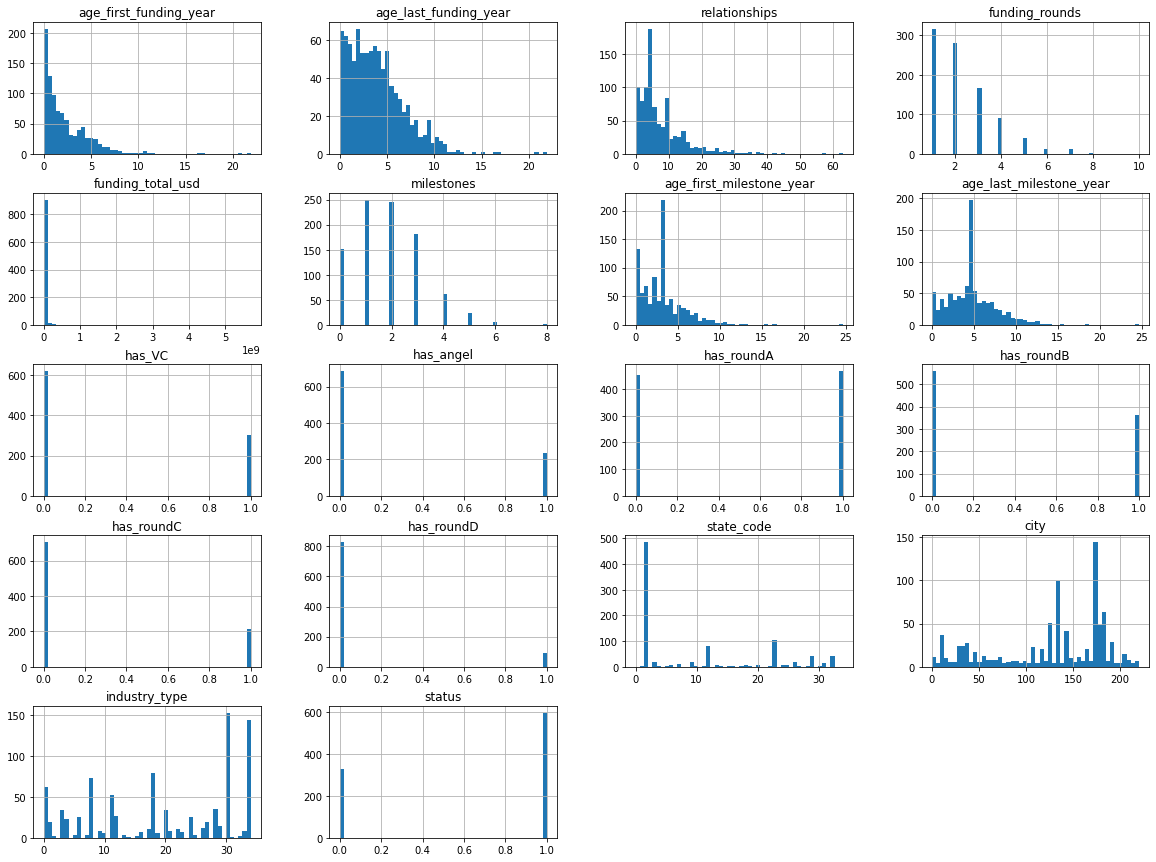

In [28]:
data_final.hist(bins=50, figsize=(20,15))
plt.show()

<AxesSubplot:>

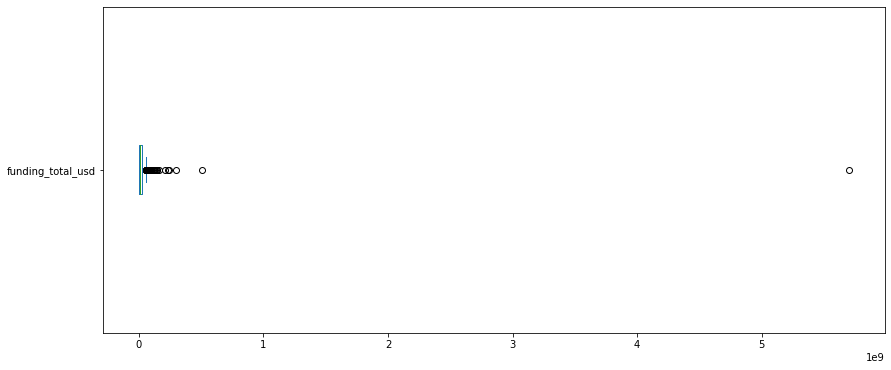

In [29]:
data_final['funding_total_usd'].plot(kind='box', vert=False,figsize=(14,6))

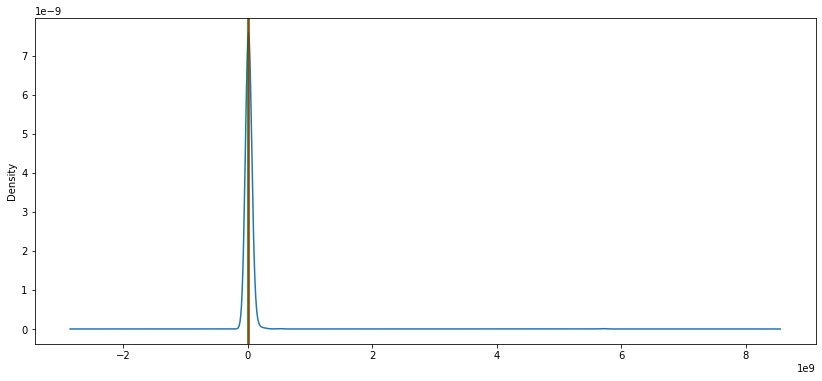

In [30]:
ax = data_final['funding_total_usd'].plot(kind='density', figsize=(14,6)) # kde
ax.axvline(data_final['funding_total_usd'].mean(), color='red')
ax.axvline(data_final['funding_total_usd'].median(), color='green')

<AxesSubplot:ylabel='milestones'>

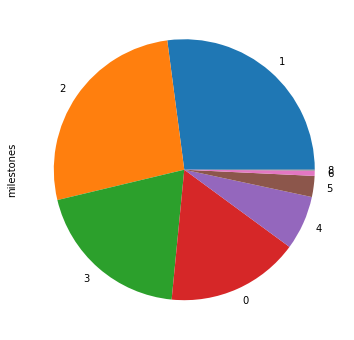

In [31]:
data_final['milestones'].value_counts().plot(kind='pie',figsize=(14,6))

<AxesSubplot:ylabel='Frequency'>

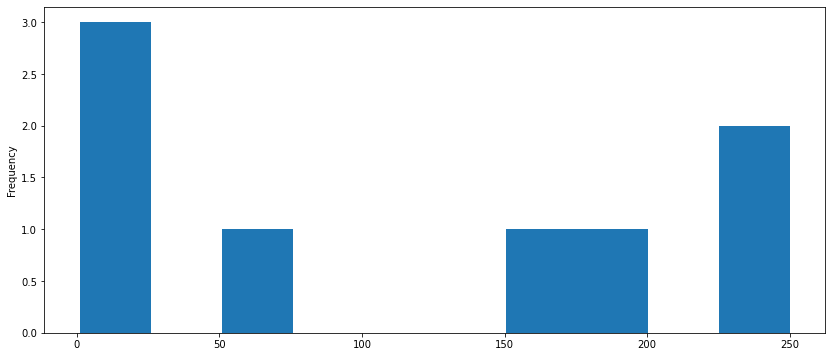

In [32]:
data_final['milestones'].value_counts().plot(kind='hist',figsize=(14,6))

In [33]:
corr = data_final.corr()

corr

age_first_funding_year  age_last_funding_year  \
age_first_funding_year                  1.000000               0.755921   
age_last_funding_year                   0.755921               1.000000   
relationships                          -0.195097               0.071947   
funding_rounds                         -0.161961               0.386045   
funding_total_usd                       0.045977               0.117200   
milestones                             -0.304118              -0.125861   
age_first_milestone_year                0.507185               0.629617   
age_last_milestone_year                 0.393348               0.568442   
has_VC                                  0.171521               0.353333   
has_angel                              -0.342829              -0.353762   
has_roundA                             -0.307696              -0.106063   
has_roundB                             -0.067114               0.257885   
has_roundC                              0.031228               0.318907   
has_roundD                              0.119491               0.314535   
state_code                             -0.038466              -0.072406   
city                                   -0.039796              -0.074799   
industry_type                           0.000595              -0.049277   
status                                 -0.092028               0.067870   

                          relationships  funding_rounds  funding_total_usd  \
age_first_funding_year        -0.195097       -0.161961           0.045977   
age_last_funding_year          0.071947        0.386045           0.117200   
relationships                  1.000000        0.358883           0.093790   
funding_rounds                 0.358883        1.000000           0.115800   
funding_total_usd              0.093790        0.115800           1.000000   
milestones                     0.513835        0.230162           0.012056   
age_first_milestone_year       0.234736        0.179057           0.065103   
age_last_milestone_year        0.326917        0.238229           0.094548   
has_VC                        -0.028938        0.334832           0.010060   
has_angel                     -0.060625        0.010606          -0.059650   
has_roundA                     0.317130        0.260598          -0.023721   
has_roundB                     0.285015        0.444454           0.020119   
has_roundC                     0.259842        0.440923           0.045405   
has_roundD                     0.207488        0.323620           0.045146   
state_code                    -0.091086       -0.042807           0.051226   
city                           0.053883       -0.077718          -0.027347   
industry_type                 -0.072214       -0.093349          -0.023858   
status                         0.360434        0.206049           0.040176   

                          milestones  age_first_milestone_year  \
age_first_funding_year     -0.304118                  0.507185   
age_last_funding_year      -0.125861                  0.629617   
relationships               0.513835                  0.234736   
funding_rounds              0.230162                  0.179057   
funding_total_usd           0.012056                  0.065103   
milestones                  1.000000                 -0.042625   
age_first_milestone_year   -0.042625                  1.000000   
age_last_milestone_year     0.262698                  0.787439   
has_VC                     -0.093338                  0.118405   
has_angel                   0.128255                 -0.264145   
has_roundA                  0.319986                  0.000194   
has_roundB                  0.195162                  0.173566   
has_roundC                  0.085329                  0.190625   
has_roundD                  0.020663                  0.242597   
state_code                 -0.019175                 -0.081655   
city                        0.012072                 -0.00061

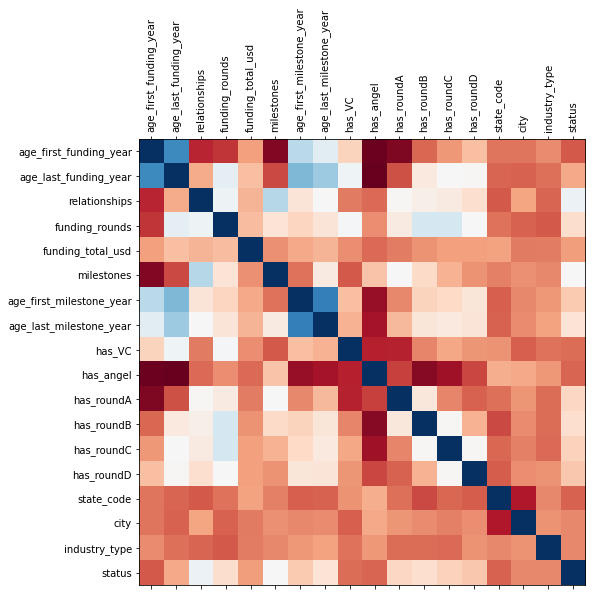

In [34]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

<AxesSubplot:xlabel='funding_rounds', ylabel='has_VC'>

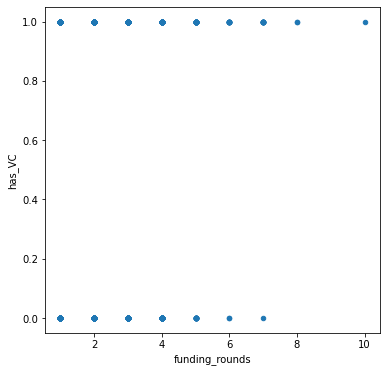

In [35]:
data_final.plot(kind='scatter', x='funding_rounds', y='has_VC', figsize=(6,6))

# 3- Appliquer le model

In [36]:
data.shape

(923, 49)

In [37]:
# nous allons diviser notre BD en une bd d'emtrainement et une bd de test

sss=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train,test in sss.split(X,y):
  X_train,X_test=X.iloc[train],X.iloc[test]
  y_train,y_test=y.iloc[train],y.iloc[test]

print('X_train size:',X_train.shape)
print('X_test size:',X_test.shape)
print('y_train size:',y_train.shape)
print('y_test size:',y_test.shape)

X_train size: (738, 17)
X_test size: (185, 17)
y_train size: (738,)
y_test size: (185,)


In [38]:
# Define the network model and its arguments. 
# Set the number of neurons/nodes for each layer:

model = Sequential()

model.add(Dense(2, input_shape=(738,17)))
model.add(Activation('sigmoid'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [39]:
# Compile the model and calculate its accuracy:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

In [40]:
# Print a summary of the Keras model:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 738, 2)            36        
_________________________________________________________________
activation (Activation)      (None, 738, 2)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 738, 1)            3         
_________________________________________________________________
activation_1 (Activation)    (None, 738, 1)            0         
Total params: 39
Trainable params: 39
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.fit(X_train,y_train, epochs=10)

Epoch 1/10
24/24 [==============================] - 18s 1ms/step - loss: 0.2497 - accuracy: 0.5716
Epoch 2/10
24/24 [==============================] - 0s 1ms/step - loss: 0.2486 - accuracy: 0.6335
Epoch 3/10
24/24 [==============================] - 0s 1ms/step - loss: 0.2474 - accuracy: 0.6530
Epoch 4/10
24/24 [==============================] - 0s 1ms/step - loss: 0.2465 - accuracy: 0.6407
Epoch 5/10
24/24 [==============================] - 0s 1ms/step - loss: 0.2449 - accuracy: 0.6555
Epoch 6/10
24/24 [==============================] - 0s 1ms/step - loss: 0.2450 - accuracy: 0.6282
Epoch 7/10
24/24 [==============================] - 0s 1ms/step - loss: 0.2450 - accuracy: 0.6147
Epoch 8/10
24/24 [==============================] - 0s 1ms/step - loss: 0.2425 - accuracy: 0.6457
Epoch 9/10
24/24 [==============================] - 0s 1ms/step - loss: 0.2407 - accuracy: 0.6595
Epoch 10/10
24/24 [==============================] - 0s 1ms/step - loss: 0.2404 - accuracy: 0.6532


In [43]:
loss, accuracy = model.evaluate(X_test,y_test)
print(loss)
print(accuracy)

6/6 [==============================] - 1s 1ms/step - loss: 0.2402 - accuracy: 0.6486
0.24016620218753815
0.6486486196517944


In [42]:
# creer notre model
# On va appliquer trois algorithmes: Logistic Regression, KNN, DecisionTree

models={
    'LogisticRegression':LogisticRegression(random_state=42),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(max_depth=1,random_state=42)
}

In [44]:
# La fonction precision(accuracy)
def accu(y_true,y_pred,retu=False):
  acc=accuracy_score(y_true,y_pred)
  if retu:
    return acc
  else:
      print(f'La precision du model est:{acc}')
      
# la fonction d'application des models
def train_test_eval(models,X_train,y_train,X_test,y_test):
  for name,model in models.items():
    print(name,':')
    model.fit(X_train,y_train)
    accu(y_test,model.predict(X_test))
    print('-'*30)

train_test_eval(models,X_train,y_train,X_test,y_test)

LogisticRegression :
La precision du model est:0.6486486486486487
------------------------------
KNeighborsClassifier :
La precision du model est:0.6162162162162163
------------------------------
DecisionTreeClassifier :
La precision du model est:0.772972972972973
------------------------------


In [48]:
# Le meilleur model c'est LogisticRegression. Nous allons l'appliquer seul maintenant
# appliquer la regression logistique sur notre bd

Classifier=DecisionTreeClassifier()
Classifier.fit(X,y)

DecisionTreeClassifier()

In [49]:
# Enregistrer le model
pickle.dump(Classifier,open('model_investor.pkl','wb'))